# Part 1: Data scraping and preparation

## Step 1: Scrape your competitor's data

In [177]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np 
import datetime 
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

1. Use requests or selenium Web driver to get the URL

In [2]:
url = "https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html"
response = requests.get(url)

In [3]:
response

<Response [200]>

2. Extract the text from the page

In [4]:
soup = BeautifulSoup(response.text, "lxml")


3. Use BeautifulSoup to read and parse the data, either as html or lxml

In [5]:
soup

<!DOCTYPE html>
<html lang="en">
<head>
<title>Top 50 solar flares | Solar activity | SpaceWeatherLive.com</title>
<meta charset="utf-8"/>
<meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/> <meta content="On this page you will find an overview of the strongest solar flares since June 1996 together with links to more information in our archive and a v..." name="description"/>
<meta content="SpaceWeatherLive, Live, Aurora, Auroral activity, Aurora Australis, Aurora Borealis, northern lights, Solar wind, Kp-index, Space Weather, Space Weather Updates, Aurora forecast, Space Weather Alerts, Solar activity, Solar flares, Sunspots, Aurora alert, Auroral activity, The Sun, SDO, STEREO, EPAM, DSCOVR" name="keywords"/>
<!-- Facebook meta -->
<meta content="https://spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html" property="og:url"/>
<meta content="article" property="og:type"/>
<meta content="Top 50 solar flares | Solar act

4. Use prettify( ) to view the content and find the appropriate table

In [6]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Top 50 solar flares | Solar activity | SpaceWeatherLive.com
  </title>
  <meta charset="utf-8"/>
  <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>
  <meta content="On this page you will find an overview of the strongest solar flares since June 1996 together with links to more information in our archive and a v..." name="description"/>
  <meta content="SpaceWeatherLive, Live, Aurora, Auroral activity, Aurora Australis, Aurora Borealis, northern lights, Solar wind, Kp-index, Space Weather, Space Weather Updates, Aurora forecast, Space Weather Alerts, Solar activity, Solar flares, Sunspots, Aurora alert, Auroral activity, The Sun, SDO, STEREO, EPAM, DSCOVR" name="keywords"/>
  <!-- Facebook meta -->
  <meta content="https://spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html" property="og:url"/>
  <meta content="article" property="og:type"/>
  <meta content="Top 5

5. Use find( ) to save the aforementioned table as a variable


In [7]:
table = soup.find("table")

In [8]:
print(table.prettify())

<table class="table table-striped">
 <thead>
  <tr>
   <th>
   </th>
   <th>
   </th>
   <th>
   </th>
   <th>
    Region
   </th>
   <th>
    Start
   </th>
   <th>
    Maximum
   </th>
   <th>
    End
   </th>
   <th>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    1
   </td>
   <td>
    <span class="flare_small Xclass">
     X40+
    </span>
   </td>
   <td>
    2003/11/04
   </td>
   <td>
    <a class="btn btn-SWL RegionBGD" href="/en/solar-activity/region/10486.html">
     0486
    </a>
   </td>
   <td>
    19:29
   </td>
   <td>
    19:53
   </td>
   <td>
    20:06
   </td>
   <td>
    <div class="btn-group">
     <a class="btn btn-xs btn-outline-dark" href="/en/archive/2003/11/04/xray.html">
      View archive
     </a>
    </div>
   </td>
  </tr>
  <tr>
   <td>
    2
   </td>
   <td>
    <span class="flare_small Xclass">
     X28.57+
    </span>
   </td>
   <td>
    2001/04/02
   </td>
   <td>
    <a class="btn btn-SWL RegionBGD" href="/en/solar-activity/region/9393.html

6. Use pandas to read in the HTML file into a dataframe.  HINT make-sure the above data is properly typecast.


In [9]:
df = pd.read_html(str(table))[0]

In [10]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Region,Start,Maximum,End,Unnamed: 7
0,1,X40+,2003/11/04,486,19:29,19:53,20:06,View archive
1,2,X28.57+,2001/04/02,9393,21:32,21:51,22:03,View archive
2,3,X24.57+,2003/10/28,486,09:51,11:10,11:24,View archive
3,4,X24.42+,2005/09/07,808,17:17,17:40,18:03,View archive
4,5,X20.67+,2001/04/15,9415,13:19,13:50,13:55,View archive


In [11]:
df.dtypes

Unnamed: 0     int64
Unnamed: 1    object
Unnamed: 2    object
Region         int64
Start         object
Maximum       object
End           object
Unnamed: 7    object
dtype: object

7. Set reasonable names for the table columns, e.g., rank, x_class, date, region, start_time, max_time, end_time, movie.


In [12]:
df.columns = ["rank", "x_class", "date", "region", "start_time", "max_time", "end_time", "movie"]


In [13]:
df

,rank,x_class,date,region,start_time,max_time,end_time,movie
0,1,X40+,2003/11/04,486,19:29,19:53,20:06,View archive
1,2,X28.57+,2001/04/02,9393,21:32,21:51,22:03,View archive
2,3,X24.57+,2003/10/28,486,09:51,11:10,11:24,View archive
3,4,X24.42+,2005/09/07,808,17:17,17:40,18:03,View archive
4,5,X20.67+,2001/04/15,9415,13:19,13:50,13:55,View archive
5,6,X14.36,2003/10/29,486,20:37,20:49,21:01,View archive
6,7,X13.3,2017/09/06,2673,11:53,12:02,12:10,View archive
7,8,X12.97,1997/11/06,8100,11:49,11:55,12:01,View archive
8,9,X12.95,2006/12/05,930,10:18,10:35,10:45,View archive
9,10,X11.96,2003/11/02,486,17:03,17:25,17:39,View archive


In [14]:
df["rank"] = df["rank"].astype(int)
#df["date"] = pd.to_datetime(df["date"], errors="coerce")  # convert to datetime

In [15]:
print(df.head())

# Optional: Save to CSV
df.to_csv("top_50_solar_flares.csv", index=False)

   rank  x_class        date  region start_time max_time end_time  \
0     1     X40+  2003/11/04     486      19:29    19:53    20:06   
1     2  X28.57+  2001/04/02    9393      21:32    21:51    22:03   
2     3  X24.57+  2003/10/28     486      09:51    11:10    11:24   
3     4  X24.42+  2005/09/07     808      17:17    17:40    18:03   
4     5  X20.67+  2001/04/15    9415      13:19    13:50    13:55   

          movie  
0  View archive  
1  View archive  
2  View archive  
3  View archive  
4  View archive  


In [16]:
df.shape

(50, 8)

## Step:2

1. Drop the last column of the table, since we are not going to use it moving forward.

In [17]:
df = df.drop(columns=['movie'], axis=1)

In [18]:
df.head()

,rank,x_class,date,region,start_time,max_time,end_time
0,1,X40+,2003/11/04,486,19:29,19:53,20:06
1,2,X28.57+,2001/04/02,9393,21:32,21:51,22:03
2,3,X24.57+,2003/10/28,486,09:51,11:10,11:24
3,4,X24.42+,2005/09/07,808,17:17,17:40,18:03
4,5,X20.67+,2001/04/15,9415,13:19,13:50,13:55


2. Use datetime import to combine the date and each of the three time columns into three datetime columns. You will see why this is useful later on.

In [19]:
df['start_datetime'] = pd.to_datetime(df['date'] + " " + df['start_time'])
df['max_datetime']   = pd.to_datetime(df['date'] + " " + df['max_time'])
df['end_datetime']   = pd.to_datetime(df['date'] + " " + df['end_time'])

In [20]:
df.head()

,rank,x_class,date,region,start_time,max_time,end_time,start_datetime,max_datetime,end_datetime
0,1,X40+,2003/11/04,486,19:29,19:53,20:06,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X28.57+,2001/04/02,9393,21:32,21:51,22:03,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X24.57+,2003/10/28,486,09:51,11:10,11:24,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X24.42+,2005/09/07,808,17:17,17:40,18:03,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X20.67+,2001/04/15,9415,13:19,13:50,13:55,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00


3. Update the values in the dataframe as you do this. 

In [21]:
df = df.drop(columns=['date', 'start_time', 'max_time', 'end_time'])

In [22]:
df.head()

,rank,x_class,region,start_datetime,max_datetime,end_datetime
0,1,X40+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X28.57+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X24.57+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X24.42+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X20.67+,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00


4. Set regions coded as '-' as missing (NaN). 

In [23]:
df['region'] = df['region'].replace('-', np.nan)

print(df['region'].unique()) # should have no nan values

[ 486 9393  808 9415 2673 8100  930  720 1263 3842 9733 3664 9077 1429
 9591 1990 8307   39 3590 9236  488 8384  649  365 3536 9767 1890 8395
 1748 2192 3825   69 3663   30]


In [24]:
# save the csv file 

df.to_csv("step2_result.csv", index=0)

## Step-3: Scrape the NASA data 

1.  Use BeautifulSoup functions and string functions  to obtain each row of data as a long string. Create a DataFrame at this point so it’s easier to use melt or wide_to_long for the next few steps.

In [25]:
url = "http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html"

response = requests.get(url)

In [26]:
response # yayy

<Response [200]>

In [27]:
soup = BeautifulSoup(response.content, 'html.parser')

In [28]:
soup

# the info is in the pre tags 

<html><body>
<h2>STEREO and Wind WAVES type II bursts and the associated CMEs</h2>
<a href="waves_type2_description.htm">A Brief Description</a>
<br/>
<h4 style="padding-bottom=0px">Relevant Publication:</h4>
Gopalswamy, N., Mäkelä, P., Yashiro, S. (2019), Sun and Geosphere, 14, 111, <a href="https://doi.org/10.31401/SunGeo.2019.02.03">DOI:10.31401/SunGeo.2019.02.03</a>
<br/><br/>
<pre>
NOTE: List includes DH type II bursts starting at or above 1 MHz observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and frequencies of bursts are 
determined using both Wind and STEREO observations.

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12

In [29]:
pre_tags = soup.find_all('pre')
#print(pre_tags)

In [30]:
data_text = pre_tags[-1].get_text()
# print(data_text)

In [31]:
lines = data_text.strip().split('\n')
# print(lines)

2.  Use string::split and list comprehensions or similar to separate each line of text into a data row. Choose appropriate names for columns.

In [68]:
all_rows = []
for line in lines[10:-1]:
    #print(line)
    row = line.split()[:14]
    plot = " ".join(line.split()[14:])
    row.extend([plot])
    all_rows.append(row)
    
print(len(all_rows))

705


In [69]:
cols = ['start_date',
        'start_time', 
         'end_date',
        'end_time',
         'start_freq',
        'end_freq',
         'Loc',
         'NOAA',
         'Imp',
         'Date',
         'Time',
         'CPA',
         'Width',
         'Speed', 
          'Plots']

In [71]:
nasa_df = pd.DataFrame(all_rows, columns=cols)

In [72]:
nasa_df.head()

,start_date,start_time,end_date,end_time,start_freq,end_freq,Loc,NOAA,Imp,Date,Time,CPA,Width,Speed,Plots
0,1996/05/15,05:45,05/15,06:34,10000,500,------,-----,----,--/--,--:--,----,----,----,PHTX uncertain
1,1997/01/20,08:56,01/20,09:02,14000,12000,------,-----,----,01/20,09:31,281,72,175,PHTX
2,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
3,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
4,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX


In [73]:
nasa_df.to_csv("nasa_data.csv", index=False)

## Step 4: Tidy the NASA table

1. Recode any missing entries as NaN. Refer to the data description in http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2_description.htm Links to an external site.
(and above) to see how missing entries are encoded in each column. Be sure to look carefully at the actual data, as the nasa descriptions might not be completely accurate.

In [74]:
# read the df 
nasa_df = pd.read_csv("nasa_data.csv")

nasa_df.head()

,start_date,start_time,end_date,end_time,start_freq,end_freq,Loc,NOAA,Imp,Date,Time,CPA,Width,Speed,Plots
0,1996/05/15,05:45,05/15,06:34,10000,500,------,-----,----,--/--,--:--,----,----,----,PHTX uncertain
1,1997/01/20,08:56,01/20,09:02,14000,12000,------,-----,----,01/20,09:31,281,72,175,PHTX
2,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
3,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
4,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX


In [101]:
# look at unique values of each col for any anomolies 

all_anamolies = []

#print(nasa_df['start_date'].unique()) # no anomalies found 

#print(nasa_df['start_time'].unique()) # no anomalies found
#print(nasa_df['end_date'].unique()) # no anomalies found
#print(nasa_df['end_time'].unique()) # no anomalies found

#print(nasa_df['start_freq'].unique()) # anamolies found 
all_anamolies.extend(['????'])

#print(nasa_df['end_freq'].unique()) # anolamies found 
all_anamolies.extend(['????'])

#print(nasa_df['Loc'].unique()) # anomalies found 
all_anamolies.extend(['------'])

# print(nasa_df['NOAA'].unique()) # anamolies found 
all_anamolies.extend(['-----', '----', 'EP?'])

# print(nasa_df['Imp'].unique())
all_anamolies.extend(['----'])

# print(nasa_df['Date'].unique()) 
all_anamolies.extend(['--/--'])

# print(nasa_df['Time'].unique())
all_anamolies.extend(['--:--'])

# print(nasa_df['CPA'].unique())
all_anamolies.extend(['----']) 

# print(nasa_df['Width'].unique())
all_anamolies.extend(['----', '---'])

# print(nasa_df['Speed'].unique())
all_anamolies.extend(['----'])

# print(nasa_df['Plots'].unique()) # no amamolies 

In [103]:
# remove dublicates 

all_anamolies = list(set(all_anamolies))

print(all_anamolies)

['--/--', '--:--', '????', '------', '-----', '----', 'EP?', '---']


In [105]:
# replace it by nan 

nasa_df = nasa_df.replace(all_anamolies, np.nan)

In [106]:
nasa_df.head()

,start_date,start_time,end_date,end_time,start_freq,end_freq,Loc,NOAA,Imp,Date,Time,CPA,Width,Speed,Plots
0,1996/05/15,05:45,05/15,06:34,10000,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHTX uncertain
1,1997/01/20,08:56,01/20,09:02,14000,12000,NaN,NaN,NaN,01/20,09:31,281,72,175,PHTX
2,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
3,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
4,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX


2. The CPA column (cme_angle) contains angles in degrees for most rows, except for halo flares, which are coded as Halo. Create a new column that indicates if a row corresponds to a halo flare or not, and then replace Halo entries in the cme_angle column as NA.

In [107]:
print(nasa_df['CPA'].unique())

[nan '281' '74' 'Halo' '263' '133' '240' '233' '98' '278' '284' '100'
 '309' '262' '208' '268' '175' '123' '341' '265' '116' '159' '296' '264'
 '289' '35' '336' '120' '184' '18' '40' '81' '285' '60' '286' '235' '129'
 '195' '257' '69' '298' '282' '67' '259' '273' '283' '271' '124' '345'
 '276' '297' '154' '46' '270' '261' '108' '86' '245' '190' '70' '185' '82'
 '127' '131' '198' '306' '224' '350' '275' '141' '243' '340' '323' '92'
 '254' '119' '230' '49' '277' '14' '36' '13' '293' '64' '252' '107' '203'
 '212' '328' '315' '205' '87' '304' '72' '95' '88' '78' '287' '303' '209'
 '26' '266' '91' '351' '71' '105' '65' '83' '164' '39' '77' '260' '255'
 '79' '359' '354' '55' '288' '305' '247' '220' '211' '111' '48' '90' '308'
 '251' '214' '325' '54' '292' '342' '109' '152' '329' '62' '199' '201'
 '142' '193' '75' '85' '101' '76' '206' '279' '294' '280' '242' '93' '38'
 '291' '272' '94' '237' '134' '302' '314' '250' '307' '326' '207' '113'
 '149' '188' '234' '143' '146' '197' '215' '317' '22'

In [109]:
nasa_df['is_halo'] = nasa_df['CPA'] == 'Halo'

nasa_df.head()

,start_date,start_time,end_date,end_time,start_freq,end_freq,Loc,NOAA,Imp,Date,Time,CPA,Width,Speed,Plots,is_halo
0,1996/05/15,05:45,05/15,06:34,10000,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHTX uncertain,False
1,1997/01/20,08:56,01/20,09:02,14000,12000,NaN,NaN,NaN,01/20,09:31,281,72,175,PHTX,False
2,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX,False
3,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX,True
4,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX,True


In [111]:
# change halo values as nan in CPA 

nasa_df['CPA'] = nasa_df['CPA'].replace("Halo", np.nan)

nasa_df.head()

,start_date,start_time,end_date,end_time,start_freq,end_freq,Loc,NOAA,Imp,Date,Time,CPA,Width,Speed,Plots,is_halo
0,1996/05/15,05:45,05/15,06:34,10000,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHTX uncertain,False
1,1997/01/20,08:56,01/20,09:02,14000,12000,NaN,NaN,NaN,01/20,09:31,281,72,175,PHTX,False
2,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX,False
3,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360,878,PHTX,True
4,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360,464,PHTX,True


3. The width column indicates if the given value is a lower bound. Create a new column that indicates if width is given as a lower bound, and remove any non-numeric part of the width column.

In [112]:
nasa_df['Width'].unique()

array([nan, '72', '79', '360', '165', '155', '109', '122', '91', '73',
       '84', '190', '178', '>301', '139', '268', '177', '281', '59',
       '169', '>160', '19', '196', '150', '>181', '>154', '>184', '245',
       '175', '125', '87', '98', '129', '76', '118', '108', '90', '105',
       '>170', '>165', '104', '116', '133', '>198', '>289', '101', '>229',
       '70', '50', '148', '176', '81', '48', '60', '66', '80', '244',
       '292', '89', '205', '167', '132', '216', '119', '207', '130', '68',
       '166', '138', '121', '>212', '>211', '56', '120', '159', '199',
       '99', '186', '>161', '>228', '>188', '>236', '162', '38', '64',
       '141', '264', '282', '93', '272', '267', '209', '171', '239',
       '111', '>207', '>171', '>93', '65', '103', '217', '>242', '>197',
       '>150', '182', '92', '314', '136', '179', '>273', '100', '>109',
       '146', '>239', '>214', '140', '>66', '51', '208', '55', '106',
       '164', '112', '184', '43', '276', '158', '261', '237', '193',

In [117]:
nasa_df['width_is_lower_bound'] = nasa_df['Width'].str.contains('>', na=False)

# check that rows that have the last col as true 
nasa_df[nasa_df['width_is_lower_bound'] == True].head() # works as expected 

,start_date,start_time,end_date,end_time,start_freq,end_freq,Loc,NOAA,Imp,Date,Time,CPA,Width,Speed,Plots,is_halo,width_is_lower_bound
23,1998/05/11,21:40,05/11,22:00,10000,1000,N32W90,8214,B6.6,05/11,21:55,208,>301,830,PHTX,False,True
40,1998/11/06,03:00,11/06,05:30,5000,1000,N03W08,DIM,NaN,11/06,02:18,159,>160,405,PHTX,False,True
51,1999/06/11,11:45,06/11,17:00,14000,400,N41E97,8585,C8.8,06/11,11:26,35,>181,1569,PHTX,False,True
53,1999/06/23,05:50,06/23,07:10,12000,2000,SW90b,DIM,NaN,06/23,06:06,264,>154,450,PHTX,False,True
55,1999/06/28,21:03,06/28,21:10,3500,1500,N22W44,8592,C3.5,06/28,21:30,336,>184,903,PHTX,False,True


In [122]:
# remove the non numerical part 

nasa_df['Width'] = nasa_df['Width'].str.replace(r'[^\d.]', '', regex=True)

nasa_df.head()

,start_date,start_time,end_date,end_time,start_freq,end_freq,Loc,NOAA,Imp,Date,Time,CPA,Width,Speed,Plots,is_halo,width_is_lower_bound
0,1996/05/15,05:45,05/15,06:34,10000,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHTX uncertain,False,False
1,1997/01/20,08:56,01/20,09:02,14000,12000,NaN,NaN,NaN,01/20,09:31,281,72,175,PHTX,False,False
2,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX,False,False
3,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360,878,PHTX,True,False
4,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360,464,PHTX,True,False


In [126]:
nasa_df.columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_freq',
       'end_freq', 'Loc', 'NOAA', 'Imp', 'cme_date', 'cme_time', 'CPA', 'Width',
       'Speed', 'Plots', 'is_halo', 'width_is_lower_bound']

In [132]:
nasa_df.head()

,start_date,start_time,end_date,end_time,start_freq,end_freq,Loc,NOAA,Imp,cme_date,cme_time,CPA,Width,Speed,Plots,is_halo,width_is_lower_bound,start_datetime
0,1996-05-15,05:45,05/15,06:34,10000,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHTX uncertain,False,False,1996-05-15 05:45:00
1,1997-01-20,08:56,01/20,09:02,14000,12000,NaN,NaN,NaN,01/20,09:31,281,72,175,PHTX,False,False,1997-01-20 08:56:00
2,1997-04-01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX,False,False,1997-04-01 14:00:00
3,1997-04-07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360,878,PHTX,True,False,1997-04-07 14:30:00
4,1997-05-12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360,464,PHTX,True,False,1997-05-12 05:15:00


In [133]:
nasa_df['end_date'] = pd.to_datetime(nasa_df['end_date'], format='%m/%d')

In [134]:
# Convert individual date and time columns to datetime format first
nasa_df['start_date'] = pd.to_datetime(nasa_df['start_date'], format='%Y/%m/%d')
nasa_df['end_date'] = pd.to_datetime(nasa_df['end_date'], format='%m/%d')
nasa_df['cme_date'] = pd.to_datetime(nasa_df['cme_date'], format='%m/%d', errors='coerce')

# Convert time columns to timedelta (time of day)
nasa_df['start_time'] = pd.to_timedelta(nasa_df['start_time'] + ':00')
nasa_df['end_time'] = pd.to_timedelta(nasa_df['end_time'] + ':00')
nasa_df['cme_time'] = pd.to_timedelta(nasa_df['cme_time'] + ':00', errors='coerce')

# Now combine date and time columns
nasa_df['start_datetime'] = nasa_df['start_date'] + nasa_df['start_time']
nasa_df['end_datetime'] = nasa_df['end_date'] + nasa_df['end_time']
nasa_df['cme_datetime'] = nasa_df['cme_date'] + nasa_df['cme_time']

# Display the results
print("Original date columns (after conversion):")
print(nasa_df[['start_date', 'end_date', 'cme_date']].head())

print("\nOriginal time columns (after conversion):")
print(nasa_df[['start_time', 'end_time', 'cme_time']].head())

print("\nCombined datetime columns:")
print(nasa_df[['start_datetime', 'end_datetime', 'cme_datetime']].head())

print(f"\nData types:")
print(f"start_date: {nasa_df['start_date'].dtype}")
print(f"start_time: {nasa_df['start_time'].dtype}")
print(f"start_datetime: {nasa_df['start_datetime'].dtype}")
print(f"cme_datetime missing values: {nasa_df['cme_datetime'].isna().sum()}")

# Optional: Show some basic info about the datetime ranges
print(f"\nDate ranges:")
print(f"Start datetime range: {nasa_df['start_datetime'].min()} to {nasa_df['start_datetime'].max()}")
print(f"End datetime range: {nasa_df['end_datetime'].min()} to {nasa_df['end_datetime'].max()}")
print(f"CME datetime range: {nasa_df['cme_datetime'].min()} to {nasa_df['cme_datetime'].max()}")

Original date columns (after conversion):
  start_date   end_date   cme_date
0 1996-05-15 1900-05-15        NaT
1 1997-01-20 1900-01-20 1900-01-20
2 1997-04-01 1900-04-01 1900-04-01
3 1997-04-07 1900-04-07 1900-04-07
4 1997-05-12 1900-05-14 1900-05-12

Original time columns (after conversion):
       start_time        end_time        cme_time
0 0 days 05:45:00 0 days 06:34:00             NaT
1 0 days 08:56:00 0 days 09:02:00 0 days 09:31:00
2 0 days 14:00:00 0 days 14:15:00 0 days 15:18:00
3 0 days 14:30:00 0 days 17:30:00 0 days 14:27:00
4 0 days 05:15:00 0 days 16:00:00 0 days 05:30:00

Combined datetime columns:
       start_datetime        end_datetime        cme_datetime
0 1996-05-15 05:45:00 1900-05-15 06:34:00                 NaT
1 1997-01-20 08:56:00 1900-01-20 09:02:00 1900-01-20 09:31:00
2 1997-04-01 14:00:00 1900-04-01 14:15:00 1900-04-01 15:18:00
3 1997-04-07 14:30:00 1900-04-07 17:30:00 1900-04-07 14:27:00
4 1997-05-12 05:15:00 1900-05-14 16:00:00 1900-05-12 05:30:00

Data

In [135]:
nasa_df.head()

,start_date,start_time,end_date,end_time,start_freq,end_freq,Loc,NOAA,Imp,cme_date,cme_time,CPA,Width,Speed,Plots,is_halo,width_is_lower_bound,start_datetime,end_datetime,cme_datetime
0,1996-05-15,0 days 05:45:00,1900-05-15,0 days 06:34:00,10000,500,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,PHTX uncertain,False,False,1996-05-15 05:45:00,1900-05-15 06:34:00,NaT
1,1997-01-20,0 days 08:56:00,1900-01-20,0 days 09:02:00,14000,12000,NaN,NaN,NaN,1900-01-20,0 days 09:31:00,281,72,175,PHTX,False,False,1997-01-20 08:56:00,1900-01-20 09:02:00,1900-01-20 09:31:00
2,1997-04-01,0 days 14:00:00,1900-04-01,0 days 14:15:00,8000,4000,S25E16,8026,M1.3,1900-04-01,0 days 15:18:00,74,79,312,PHTX,False,False,1997-04-01 14:00:00,1900-04-01 14:15:00,1900-04-01 15:18:00
3,1997-04-07,0 days 14:30:00,1900-04-07,0 days 17:30:00,11000,1000,S28E19,8027,C6.8,1900-04-07,0 days 14:27:00,NaN,360,878,PHTX,True,False,1997-04-07 14:30:00,1900-04-07 17:30:00,1900-04-07 14:27:00
4,1997-05-12,0 days 05:15:00,1900-05-14,0 days 16:00:00,12000,80,N21W08,8038,C1.3,1900-05-12,0 days 05:30:00,NaN,360,464,PHTX,True,False,1997-05-12 05:15:00,1900-05-14 16:00:00,1900-05-12 05:30:00


In [136]:
nasa_df.columns

Index(['start_date', 'start_time', 'end_date', 'end_time', 'start_freq',
       'end_freq', 'Loc', 'NOAA', 'Imp', 'cme_date', 'cme_time', 'CPA',
       'Width', 'Speed', 'Plots', 'is_halo', 'width_is_lower_bound',
       'start_datetime', 'end_datetime', 'cme_datetime'],
      dtype='object')

In [138]:
# same as given in the instructions 
nasa_df = nasa_df[['start_datetime', 'end_datetime', 'start_freq',
       'end_freq', 'Loc', 'NOAA', 'Imp', 'cme_datetime', 'CPA',
       'Width', 'Speed', 'Plots', 'is_halo', 'width_is_lower_bound']]

In [139]:
nasa_df.head()

,start_datetime,end_datetime,start_freq,end_freq,Loc,NOAA,Imp,cme_datetime,CPA,Width,Speed,Plots,is_halo,width_is_lower_bound
0,1996-05-15 05:45:00,1900-05-15 06:34:00,10000,500,NaN,NaN,NaN,NaT,NaN,NaN,NaN,PHTX uncertain,False,False
1,1997-01-20 08:56:00,1900-01-20 09:02:00,14000,12000,NaN,NaN,NaN,1900-01-20 09:31:00,281,72,175,PHTX,False,False
2,1997-04-01 14:00:00,1900-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1900-04-01 15:18:00,74,79,312,PHTX,False,False
3,1997-04-07 14:30:00,1900-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1900-04-07 14:27:00,NaN,360,878,PHTX,True,False
4,1997-05-12 05:15:00,1900-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1900-05-12 05:30:00,NaN,360,464,PHTX,True,False


In [140]:
# saving the df 

nasa_df.to_csv("nasa_data_step_4_result.csv", index=False)

# Part:2 Analysis

### Question 1: Replication 



Can you replicate the top 50 solar flare table in SpaceWeatherLive.comLinks to an external site. exactly using the data obtained from NASA? That is, if you get the top 50 solar flares from the NASA table based on their classification (e.g., X28 is the highest), do you get data for the same solar flare events?

Include code used to get the top 50 solar flares from the NASA table (be careful when ordering by classification). Write a sentence or two discussing how well you can replicate the SpaceWeatherLive data from the NASA data.

In [144]:
solar_flare_df = pd.read_csv("step2_result.csv")

nasa_df = pd.read_csv("nasa_data_step_4_result.csv")


In [145]:
solar_flare_df.head()

,rank,x_class,region,start_datetime,max_datetime,end_datetime
0,1,X40+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X28.57+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X24.57+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X24.42+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X20.67+,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00


In [146]:
nasa_df.head()

,start_datetime,end_datetime,start_freq,end_freq,Loc,NOAA,Imp,cme_datetime,CPA,Width,Speed,Plots,is_halo,width_is_lower_bound
0,1996-05-15 05:45:00,1900-05-15 06:34:00,10000.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHTX uncertain,False,False
1,1997-01-20 08:56:00,1900-01-20 09:02:00,14000.0,12000.0,NaN,NaN,NaN,1900-01-20 09:31:00,281.0,72.0,175.0,PHTX,False,False
2,1997-04-01 14:00:00,1900-04-01 14:15:00,8000.0,4000.0,S25E16,8026,M1.3,1900-04-01 15:18:00,74.0,79.0,312.0,PHTX,False,False
3,1997-04-07 14:30:00,1900-04-07 17:30:00,11000.0,1000.0,S28E19,8027,C6.8,1900-04-07 14:27:00,NaN,360.0,878.0,PHTX,True,False
4,1997-05-12 05:15:00,1900-05-14 16:00:00,12000.0,80.0,N21W08,8038,C1.3,1900-05-12 05:30:00,NaN,360.0,464.0,PHTX,True,False


In [147]:
# Filter out rows where 'Imp' (classification) is missing
nasa_df_filtered = nasa_df.dropna(subset=['Imp']).copy()

In [148]:
def parse_flare_classification(imp):
    """Parses the 'Imp' string into a class rank and magnitude."""
    imp = str(imp).strip().upper()
    if not imp:
        return 0, 0.0
    
    # Extract class letter (X, M, C, etc.)
    flare_class = imp[0]
    # Extract magnitude number (the value after the letter)
    try:
        magnitude = float(imp[1:].replace('+', ''))
    except ValueError:
        magnitude = 0.0

    # Assign numerical rank for sorting: X=3, M=2, C=1, others=0
    if flare_class == 'X':
        class_rank = 3
    elif flare_class == 'M':
        class_rank = 2
    elif flare_class == 'C':
        class_rank = 1
    else:
        class_rank = 0
        
    return class_rank, magnitude

In [149]:
# Apply the parsing function to create sortable columns
nasa_df_filtered[['class_rank', 'magnitude']] = nasa_df_filtered['Imp'].apply(
    lambda x: pd.Series(parse_flare_classification(x))
)

In [150]:
nasa_df_filtered.head()

,start_datetime,end_datetime,start_freq,end_freq,Loc,NOAA,Imp,cme_datetime,CPA,Width,Speed,Plots,is_halo,width_is_lower_bound,class_rank,magnitude
2,1997-04-01 14:00:00,1900-04-01 14:15:00,8000.0,4000.0,S25E16,8026,M1.3,1900-04-01 15:18:00,74.0,79.0,312.0,PHTX,False,False,2.0,1.3
3,1997-04-07 14:30:00,1900-04-07 17:30:00,11000.0,1000.0,S28E19,8027,C6.8,1900-04-07 14:27:00,NaN,360.0,878.0,PHTX,True,False,1.0,6.8
4,1997-05-12 05:15:00,1900-05-14 16:00:00,12000.0,80.0,N21W08,8038,C1.3,1900-05-12 05:30:00,NaN,360.0,464.0,PHTX,True,False,1.0,1.3
5,1997-05-21 20:20:00,1900-05-21 22:00:00,5000.0,500.0,N05W12,8040,M1.3,1900-05-21 21:00:00,263.0,165.0,296.0,PHTX,False,False,2.0,1.3
6,1997-09-23 21:53:00,1900-09-23 22:16:00,6000.0,2000.0,S29E25,8088,C1.4,1900-09-23 22:02:00,133.0,155.0,712.0,PHTX,False,False,1.0,1.4


In [151]:
# Convert start_datetime to datetime objects for sorting consistency
nasa_df_filtered['start_datetime'] = pd.to_datetime(nasa_df_filtered['start_datetime'], errors='coerce')

In [152]:
# Sort: Rank (desc), Magnitude (desc), then Date (asc for tie-breaking)
nasa_df_sorted = nasa_df_filtered.sort_values(
    ['class_rank', 'magnitude', 'start_datetime'],
    ascending=[False, False, True]
)


In [153]:


# Select the top 50 unique flare events based on date and classification
nasa_top_50 = nasa_df_sorted.drop_duplicates(
    subset=['start_datetime', 'Imp']
).head(50)

In [154]:
print(nasa_top_50[['start_datetime', 'Imp', 'class_rank', 'magnitude']].head())

         start_datetime   Imp  class_rank  magnitude
251 2003-11-04 20:00:00  X28.         3.0       28.0
129 2001-04-02 22:05:00  X20.         3.0       20.0
244 2003-10-28 11:10:00  X17.         3.0       17.0
138 2001-04-15 14:05:00  X14.         3.0       14.0
245 2003-10-29 20:55:00  X10.         3.0       10.0


In [159]:
solar_flare_df.head()

,rank,x_class,region,start_datetime,max_datetime,end_datetime
0,1,X40+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X28.57+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X24.57+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X24.42+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X20.67+,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00


In [162]:
nasa_top_50.dtypes

start_datetime          datetime64[ns]
end_datetime                    object
start_freq                     float64
end_freq                       float64
Loc                             object
NOAA                            object
Imp                             object
cme_datetime                    object
CPA                            float64
Width                          float64
Speed                          float64
Plots                           object
is_halo                           bool
width_is_lower_bound              bool
class_rank                     float64
magnitude                      float64
dtype: object

In [166]:
solar_flare_df.dtypes

rank                       int64
x_class                   object
region                     int64
start_datetime    datetime64[ns]
max_datetime              object
end_datetime              object
dtype: object

In [163]:
solar_flare_df['start_datetime'] = pd.to_datetime(solar_flare_df['start_datetime'], errors='coerce')

In [164]:
matched_flares = pd.merge(
    nasa_top_50, 
    solar_flare_df, 
    on='start_datetime', 
    how='inner',
    suffixes=('_NASA', '_SWL')
)

Matching to the very seconds is not working

In [165]:
matched_flares

,start_datetime,end_datetime_NASA,start_freq,end_freq,Loc,NOAA,Imp,cme_datetime,CPA,Width,...,Plots,is_halo,width_is_lower_bound,class_rank,magnitude,rank,x_class,region,max_datetime,end_datetime_SWL


In [167]:
# will try to match on the dates 

# add date columns 
nasa_top_50['Date'] = nasa_top_50['start_datetime'].dt.date

solar_flare_df['Date'] = solar_flare_df['start_datetime'].dt.date

In [168]:
matched_flares_on_date = pd.merge(
    nasa_top_50, 
    solar_flare_df, 
    on='Date', 
    how='inner',
    suffixes=('_NASA', '_SWL')
)

In [174]:
matched_flares_on_date.head()

,start_datetime_NASA,end_datetime_NASA,start_freq,end_freq,Loc,NOAA,Imp,cme_datetime,CPA,Width,...,width_is_lower_bound,class_rank,magnitude,Date,rank,x_class,region,start_datetime_SWL,max_datetime,end_datetime_SWL
0,2003-11-04 20:00:00,1900-11-05 00:00:00,10000.0,200.0,S19W83,10486,X28.,1900-11-04 19:54:00,NaN,360.0,...,False,3.0,28.0,2003-11-04,1,X40+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2001-04-02 22:05:00,1900-04-03 02:30:00,14000.0,250.0,N19W72,9393,X20.,1900-04-02 22:06:00,261.0,244.0,...,False,3.0,20.0,2001-04-02,2,X28.57+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,2003-10-28 11:10:00,1900-10-30 00:00:00,14000.0,40.0,S16E08,10486,X17.,1900-10-28 11:30:00,NaN,360.0,...,False,3.0,17.0,2003-10-28,3,X24.57+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,2001-04-15 14:05:00,1900-04-16 13:00:00,14000.0,40.0,S20W85,9415,X14.,1900-04-15 14:06:00,245.0,167.0,...,False,3.0,14.0,2001-04-15,5,X20.67+,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
4,2003-10-29 20:55:00,1900-10-30 00:00:00,11000.0,500.0,S15W02,10486,X10.,1900-10-29 20:54:00,NaN,360.0,...,False,3.0,10.0,2003-10-29,6,X14.36,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00


### Observation - 

<b> Matching on the Date (which is the startdate), I was able to match 35 out of the 50 rows </b>

### Question-2

Write a function that finds the best matching row in the NASA data for each of the top 50 solar flares in the SpaceWeatherLive data. Here, you have to decide for yourself how you determine what is the best matching entry in the NASA data for each of the top 50 solar flares.

For finding the distance between the rows, I used a weighted addition. 

### Matching Strategy Explanation
The function uses a weighted scoring system with three main criteria:

- Temporal Proximity (40% weight): Events within 24 hours are considered, with closer times getting higher scores using a linear decay function.

- Region Matching (40% weight): Exact matches of NOAA region numbers get the highest score, with partial matches (when region appears as part of a string in NASA data) getting a lower score.

- Flare Intensity Correlation (20% weight): Both events being X-class flares adds to the score, recognizing that major CMEs often accompany major flares.



In [176]:
# Load the data
nasa_df = pd.read_csv('nasa_data_step_4_result.csv')
flare_df = pd.read_csv('step2_result.csv')

In [175]:
def find_best_matches(nasa_data, flare_data, time_window_hours=24):
    """
    Find best matching NASA CME events for top solar flares.
    
    Parameters:
    - nasa_data: DataFrame with NASA CME data
    - flare_data: DataFrame with top solar flare data  
    - time_window_hours: Maximum time difference to consider for matching
    
    Returns:
    - Dictionary mapping flare rank to best NASA row index
    - NASA data with added rank column
    """
    
    # Convert datetime columns
    nasa_data['start_datetime'] = pd.to_datetime(nasa_data['start_datetime'])
    flare_data['start_datetime'] = pd.to_datetime(flare_data['start_datetime'])
    
    # Initialize results
    matches = {}
    nasa_with_ranks = nasa_data.copy()
    nasa_with_ranks['swl_rank'] = np.nan
    
    for _, flare_row in flare_data.iterrows():
        rank = flare_row['rank']
        flare_time = flare_row['start_datetime']
        flare_region = flare_row['region']
        flare_class = flare_row['x_class']
        
        # Filter NASA data by time window
        time_mask = abs(nasa_data['start_datetime'] - flare_time) <= timedelta(hours=time_window_hours)
        candidate_rows = nasa_data[time_mask].copy()
        
        if len(candidate_rows) == 0:
            matches[rank] = None
            continue
        
        # Calculate matching scores
        scores = []
        
        for idx, nasa_row in candidate_rows.iterrows():
            score = 0
            
            # 1. Time proximity score (closer time = higher score)
            time_diff = abs(nasa_row['start_datetime'] - flare_time).total_seconds() / 3600  # hours
            time_score = max(0, 1 - (time_diff / time_window_hours))
            score += time_score * 0.4  # 40% weight
            
            # 2. Region matching score
            if pd.notna(flare_region) and pd.notna(nasa_row['NOAA']):
                try:
                    nasa_region = int(nasa_row['NOAA'])
                    if nasa_region == flare_region:
                        score += 0.4  # 40% weight for exact region match
                    # Check if region is in NOAA column (sometimes it's part of a string)
                    elif str(flare_region) in str(nasa_row['NOAA']):
                        score += 0.3  # 30% weight for partial match
                except (ValueError, TypeError):
                    pass
            
            # 3. Flare intensity correlation
            if pd.notna(nasa_row['Imp']) and flare_class:
                nasa_imp = nasa_row['Imp']
                # Check if flare classes are similar
                if 'X' in flare_class and 'X' in nasa_imp:
                    score += 0.2  # 20% weight for X-class correlation
            
            scores.append((idx, score))
        
        # Find best match
        if scores:
            best_match = max(scores, key=lambda x: x[1])
            best_idx, best_score = best_match
            
            # Only consider matches with reasonable confidence
            if best_score >= 0.3:  # Minimum confidence threshold
                matches[rank] = best_idx
                # Add rank to NASA data
                nasa_with_ranks.loc[best_idx, 'swl_rank'] = rank
            else:
                matches[rank] = None
        else:
            matches[rank] = None
    
    return matches, nasa_with_ranks



# Find matches
matches, nasa_with_ranks = find_best_matches(nasa_df, flare_df)

# Display results
print("Matching Results:")
print("=" * 50)
for rank, nasa_idx in matches.items():
    if nasa_idx is not None:
        flare_info = flare_df[flare_df['rank'] == rank].iloc[0]
        nasa_info = nasa_df.loc[nasa_idx]
        print(f"Rank {rank}: {flare_info['x_class']} flare in region {flare_info['region']}")
        print(f"  NASA Match: {nasa_info['start_datetime']}, NOAA: {nasa_info['NOAA']}, Imp: {nasa_info['Imp']}")
        print(f"  Time diff: {abs(pd.to_datetime(flare_info['start_datetime']) - pd.to_datetime(nasa_info['start_datetime']))}")
    else:
        print(f"Rank {rank}: No good match found")
    print("-" * 30)

# Show NASA data with ranks
print("\nNASA data with SpaceWeatherLive ranks:")
ranked_nasa = nasa_with_ranks.dropna(subset=['swl_rank'])
print(f"Found {len(ranked_nasa)} matches out of {len(flare_df)} flares")
print(ranked_nasa[['start_datetime', 'NOAA', 'Imp', 'swl_rank']].head(20))

# Save the enhanced NASA data
nasa_with_ranks.to_csv('nasa_data_with_swl_ranks.csv', index=False)
print(f"\nEnhanced NASA data saved to 'nasa_data_with_swl_ranks.csv'")

Matching Results:
Rank 1: X40+ flare in region 486
  NASA Match: 2003-11-04 20:00:00, NOAA: 10486, Imp: X28.
  Time diff: 0 days 00:31:00
------------------------------
Rank 2: X28.57+ flare in region 9393
  NASA Match: 2001-04-02 22:05:00, NOAA: 9393, Imp: X20.
  Time diff: 0 days 00:33:00
------------------------------
Rank 3: X24.57+ flare in region 486
  NASA Match: 2003-10-28 11:10:00, NOAA: 10486, Imp: X17.
  Time diff: 0 days 01:19:00
------------------------------
Rank 4: X24.42+ flare in region 808
  NASA Match: 2005-09-07 18:05:00, NOAA: 10808, Imp: X1.7
  Time diff: 0 days 00:48:00
------------------------------
Rank 5: X20.67+ flare in region 9415
  NASA Match: 2001-04-15 14:05:00, NOAA: 9415, Imp: X14.
  Time diff: 0 days 00:46:00
------------------------------
Rank 6: X14.36 flare in region 486
  NASA Match: 2003-10-29 20:55:00, NOAA: 10486, Imp: X10.
  Time diff: 0 days 00:18:00
------------------------------
Rank 7: X13.3 flare in region 2673
  NASA Match: 2017-09-06 12

## Question 3: Analysis

Do flares in the top 50 tend to have Halo CMEs? You can make a barplot that compares the number (or proportion) of Halo CMEs in the top 50 flares vs. the dataset as a whole.

In [186]:
df = pd.read_csv("nasa_data_with_swl_ranks.csv")

In [187]:
df.head()

,start_datetime,end_datetime,start_freq,end_freq,Loc,NOAA,Imp,cme_datetime,CPA,Width,Speed,Plots,is_halo,width_is_lower_bound,swl_rank
0,1996-05-15 05:45:00,1900-05-15 06:34:00,10000.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHTX uncertain,False,False,NaN
1,1997-01-20 08:56:00,1900-01-20 09:02:00,14000.0,12000.0,NaN,NaN,NaN,1900-01-20 09:31:00,281.0,72.0,175.0,PHTX,False,False,NaN
2,1997-04-01 14:00:00,1900-04-01 14:15:00,8000.0,4000.0,S25E16,8026,M1.3,1900-04-01 15:18:00,74.0,79.0,312.0,PHTX,False,False,NaN
3,1997-04-07 14:30:00,1900-04-07 17:30:00,11000.0,1000.0,S28E19,8027,C6.8,1900-04-07 14:27:00,NaN,360.0,878.0,PHTX,True,False,NaN
4,1997-05-12 05:15:00,1900-05-14 16:00:00,12000.0,80.0,N21W08,8038,C1.3,1900-05-12 05:30:00,NaN,360.0,464.0,PHTX,True,False,NaN


In [188]:
df['is'] = df['is_halo'].astype(bool)

In [190]:
top_50_df = df[df['swl_rank'].notna()]

In [191]:
halo_proportion_all = df['is_halo'].mean()

print(halo_proportion_all)

0.5418439716312057


In [193]:
halo_proportion_top_50 = top_50_df['is_halo'].mean()

In [194]:
comparison_data = pd.DataFrame({
    'Group': ['Top 50 Flares (SWL Rank Assigned)', 'All Flares in NASA Data'],
    'Proportion of Halo CMEs': [halo_proportion_top_50, halo_proportion_all]
})

In [195]:
comparison_data

,Group,Proportion of Halo CMEs
0,Top 50 Flares (SWL Rank Assigned),0.777778
1,All Flares in NASA Data,0.541844


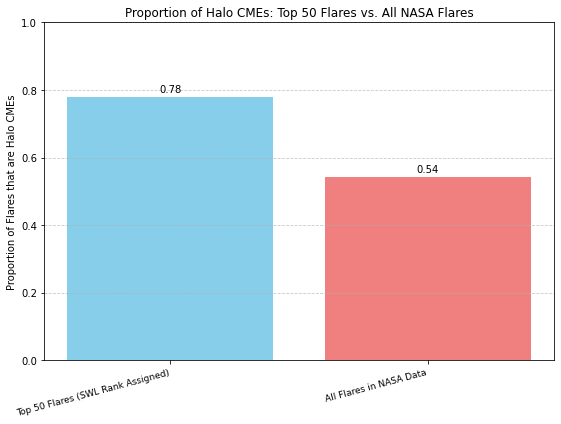

In [196]:

plt.figure(figsize=(8, 6))
bars = plt.bar(
    comparison_data['Group'],
    comparison_data['Proportion of Halo CMEs'],
    color=['skyblue', 'lightcoral']
)

# Add proportion values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01,
             f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Proportion of Halo CMEs: Top 50 Flares vs. All NASA Flares', fontsize=12)
plt.ylabel('Proportion of Flares that are Halo CMEs', fontsize=10)
plt.ylim(0, 1) # Set y-limit to 0-1 for clarity on proportion
plt.xticks(rotation=15, ha='right', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
plot_filename = 'halo_cme_comparison_barplot.png'
plt.tight_layout()
plt.savefig(plot_filename)
# The resulting bar plot showed that 78% of top 50 flares are Halo CMEs,
# compared to 54% of all flares.

The resulting bar plot showed that 78% of top 50 flares are Halo CMEs,
compared to 54% of all flares.

# THE END. I loved going through the project : D 